In [ ]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print(train_input.shape)
print(train_target.shape) #60000개의 이미지 -> 28 x 28크기

(60000, 28, 28)
(60000,)


In [ ]:
print(test_input.shape)
print(test_target.shape)

(10000, 28, 28)
(10000,)


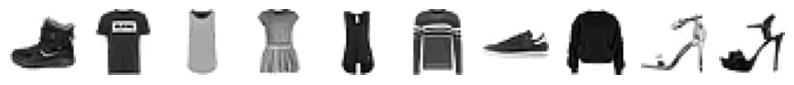

In [ ]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

In [ ]:
print([train_target[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


0 : 티셔츠

1 : 바지

2 : 스웨터

3 : 드레스

4 : 코트

5 : 샌달

6 : 셔츠

7 : 스니커즈

8: 가방

9 : 앵클 부츠

# **로지스틱 회귀로 분류**

In [ ]:
import numpy as np
print(np.unique(train_target, return_counts = True))
#0~9까지 레이블마다 정확히 6000개의 샘플이 있다.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


In [ ]:
train_scaled = train_input / 255.0 #각 픽셀은 0~255 사이의 정숫값을 가진다(MNIST한정) -> 0~1사이 값으로 변환시켜 정규화
train_scaled = train_scaled.reshape(-1, 28*28)

In [ ]:
print(train_scaled.shape) ##784개의 픽셀로 이우어진 60,000개의 샘플

(60000, 784)


In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss = 'log_loss', max_iter = 5, random_state = 42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs = -1)
print(np.mean(scores['test_score']))

0.8196000000000001


z = a x (weight) + b x (length) + c x (diagonal) + d x (height) + e x (width) + f

기본식을 MNIST 데이터에 맞게 변형하면

z_티셔츠 = w1 x (픽셀1) + w2 x (픽셀2) + ...... + w784 x (픽셀 784) + b

z_바지 = w1 x (픽셀1) + w2 x (픽셀2) + ...... + w784 x (픽셀 784) + b

이는 바지도 비슷하다. 즉 티셔츠와 바지가 서로 같은 가중치를 가지게 된다면 구분을 할수없다.

# **인공신경망(artificial neural network)**
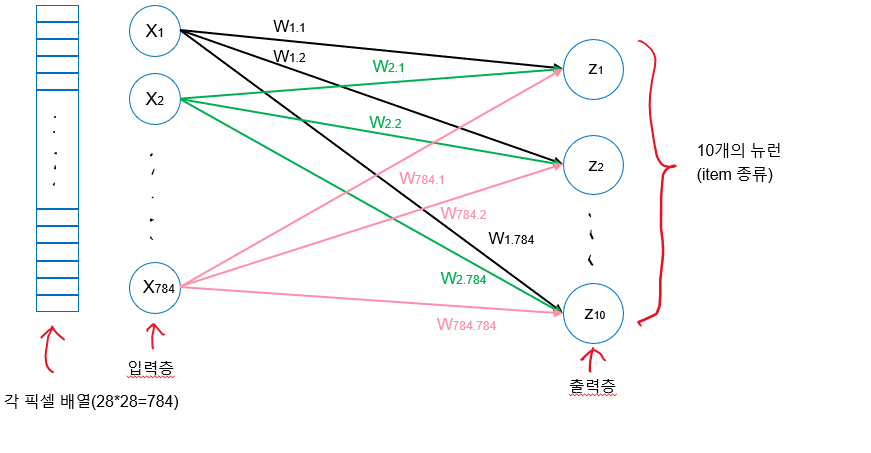

클래스가 총 10개이므로 z10까지 계산한다. 이 층을 **출력층(output layer)**이라고 한다.

인공신경망에는 z값을 계산하는 단위를 **뉴런(neuron)**이라고 한다. 최근 들어 뉴런이란 표현 대신에 **유닛(unit)**이라고도 한다.

픽셀1,2가 x1,x2....x784라고 하는 이 층을 **입력층(input layer)**라고 부른다.

z1을 만들기 위해 x1에 곱해지는 가충치는 w1.1이라고 쓰고 z2를 만들기 위해 x1에 곱해지는 가중치는 w1.2라고 부른다.

인공신경망은 1943년 **워런 매걸러**와 **월터 피츠**가 제안한 뉴런 모델로 거슬러 올라가며 이러한 모델을 **메컬러-피츠 뉴런**이라고 부른다.

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [ ]:
print(train_scaled.shape, train_target.shape)

(48000, 784) (48000,)


In [ ]:
print(val_scaled.shape, val_target.shape)

(12000, 784) (12000,)


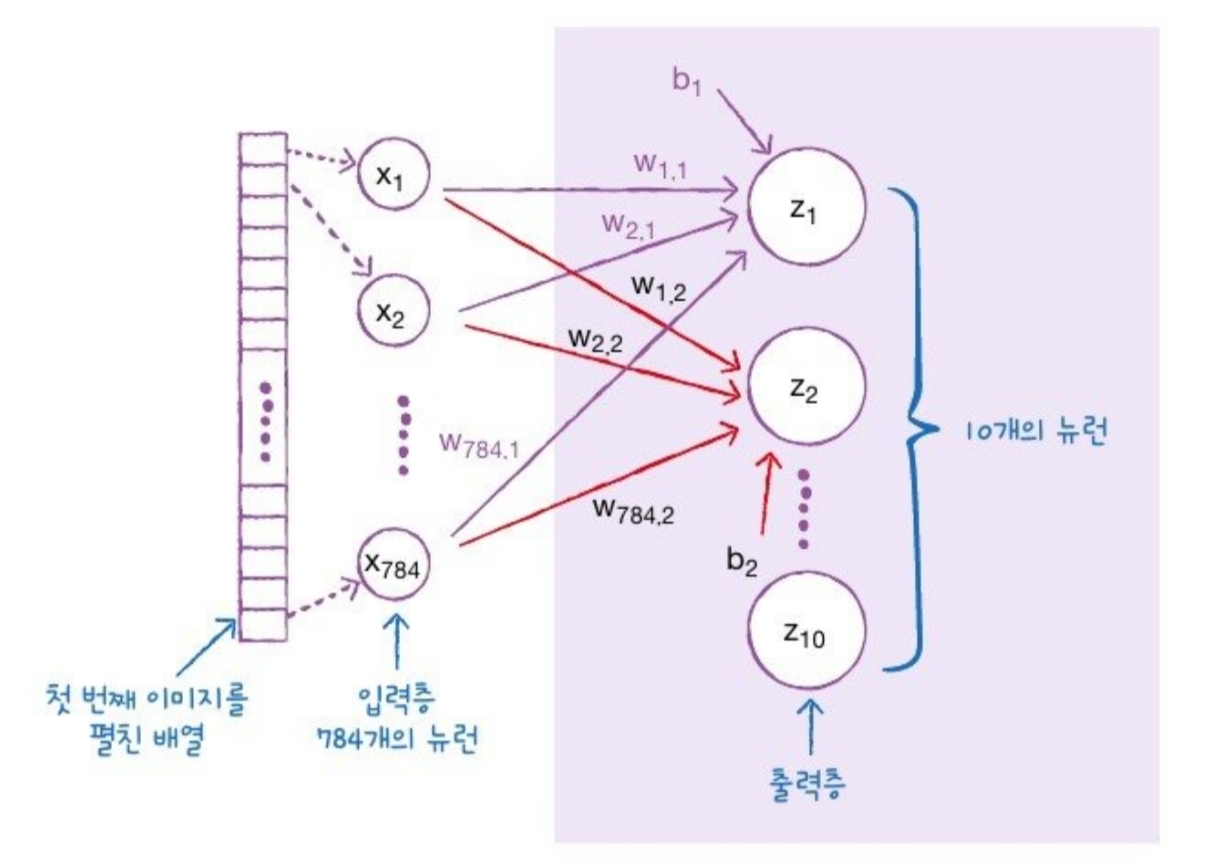



위 그림에서 보라색 부분을 밀집층(dense layer)라고 한다.

이러한 층을 양쪽 뉴런이 모두 연결하고 있기 때문에 완전 연결층(fully connected layer)이라고 한다.

In [16]:
dense = keras.layers.Dense(10, activation="softmax",input_shape=(784,))
#(뉴런의 개수, 뉴런의 출력에 적용할 함수, 입력의 크기)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model = keras.Sequential([dense])

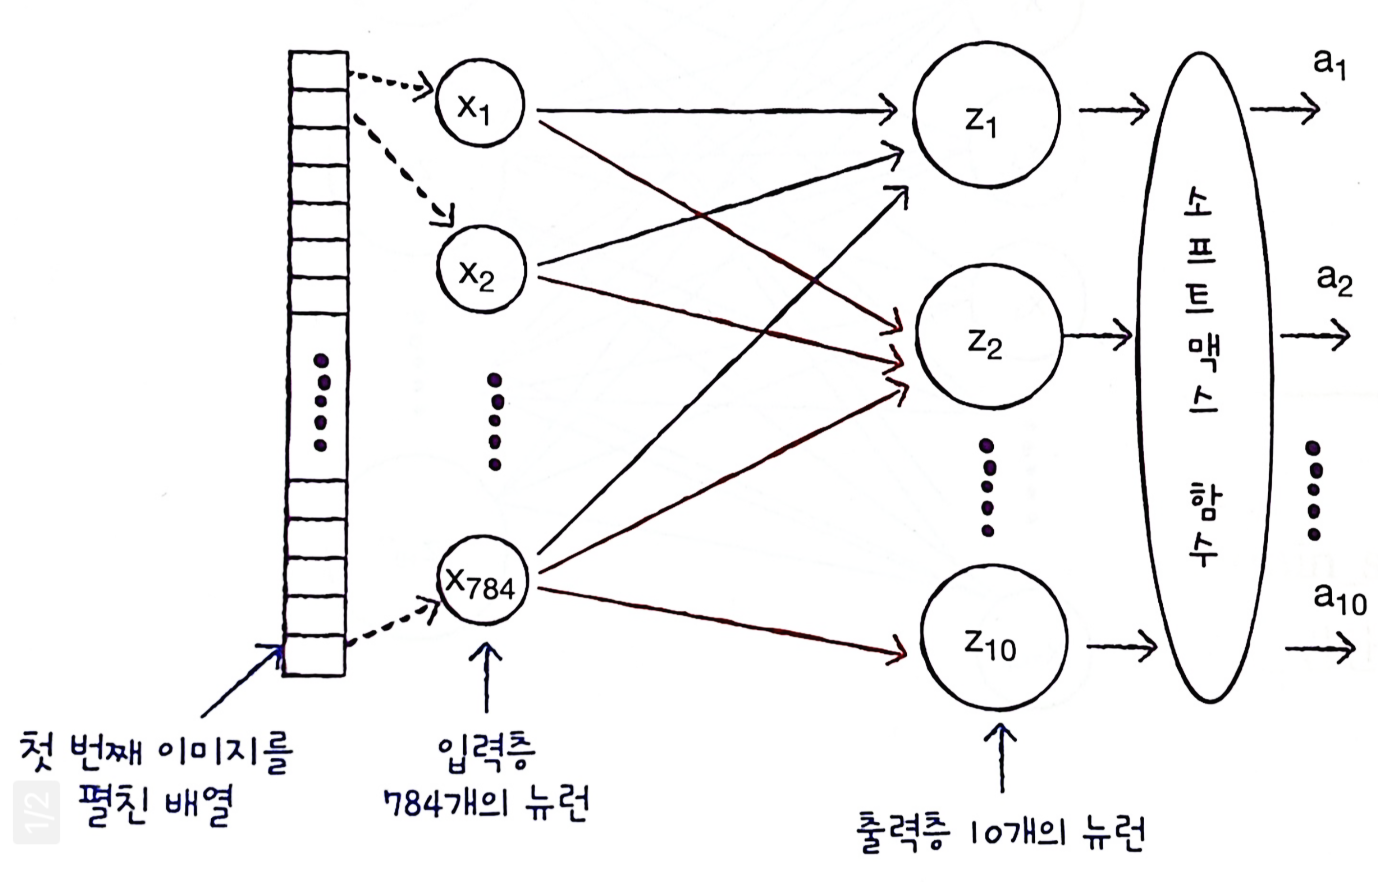

밀집층의 객체 dense를 전달하여 소프트맥스 함수가 적용되었다.

위 그림에서는 입력층과 출력층 사이에 연결선만 나타내고 가중치는 표시하지 않았다.

*절편이 뉴런마다 더해진다.

소프트맥스와 같이 뉴런의 선형방정식 계산 결과에 적용되는 함수를 **활성화 함수(activation function)**이라고 한다.

In [23]:
model.compile(loss = 'sparse_categorical_crossentropy', metrics = ["accuracy"])


*   이진 분류 : loss = 'binary_crossentropy'
*   다중 분류 : loss = 'categorical_crossentropy'



이진 크로스 엔트로피 손실을 위해 -log(예측확률)에 타깃값(정답)을 곱하였다.

*   타깃값이 1일 때(양성 샘플) : -log(a) x 타깃값
*   타깃값이 0일 때(음성 샘플) : -log(1-a) x (1 - 타깃값)



# **sparse_categorical_crossentropy**
출력층은 10개의 뉴런이 있고 10개의 클래스에 대한 확률(a1,a2,....,a10)을 출력한다.

샘플이 티셔츠일 경우 첫 번째 뉴런의 활성화 함수 출력인 a1에 크로스 엔트로피 손실 함수를 적용하고 나머지 활성화 함수 출력 a2 ~ a10까지는 모두 0으로 만든다.

[1,0,0,0,0,0,0,0,0,0]

이 배열과 출력층의 활성화 값의 배열과 곱한다.

[a1, a2, a3,...., a10] x [1,0,0,0,0,0,0,0,0,0]

이 경우 다른 원소는 모두 0이고 a1만 남게 된다.

따라서 신경망은 티셔츠 샘플에서 손실을 낮추려면 첫 번째 뉴런의 활성화 출력 a1의 값을 가능한 1에 가깝게 만들어야 한다.

이렇게 타깃값을 해당 클래스만 1이고 나머지는 모두 0인 배열로 만드는 것을 **원-핫 인코딩(one - hot encoding)**이라고 한다.

따라서 다중 분류에서 크로스 엔트로피 손실 함수를 사용할려면 0,1,2와 같이 정수로 된 타깃값을 원-핫 인코딩으로 변환해야 한다.

In [24]:
print(train_target[:10])

[7 3 5 8 6 9 3 3 9 9]


MNIST 데이터의 타깃값은 위와 같다.

텐서플로에서는 정수로 된 타깃값을 원-핫 인코딩으로 바꾸지 않고 바로 사용가능하다.

정수로된 타깃값을 사용해 크로스 엔트로피 손실을 계산하는 것이 바로 'sparse_categorical_crossentropy'이다

*sparse(희소)

In [25]:
model.fit(train_scaled, train_target, epochs = 5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7335 - loss: 0.7864
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8347 - loss: 0.4833
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8468 - loss: 0.4509
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8490 - loss: 0.4471
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8552 - loss: 0.4282


In [26]:
model.evaluate(val_scaled,val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8526 - loss: 0.4279


[0.43514859676361084, 0.8532500267028809]